<a href="https://colab.research.google.com/github/LuvMutreja/Yes-Bank-Closing-Stock-Price-Prediction/blob/main/Colab_Yes_Bank_Closing_Stock_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Project 2- Yes BANK/data_YesBank_StockPrices.csv')

In [130]:
dataset=dataset[dataset.describe().columns]

In [131]:
dataset

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41
...,...,...,...,...
180,25.60,28.30,11.10,11.95
181,12.00,17.16,11.85,14.37
182,14.30,15.34,12.75,13.15
183,13.30,14.01,12.11,12.42


In [132]:
len(dataset)

185

In [133]:
dataset.shape

(185, 4)

In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [135]:
dataset.head()

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41


In [136]:
dataset.nunique()

Open     183
High     184
Low      183
Close    185
dtype: int64

In [137]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Distribution Check 

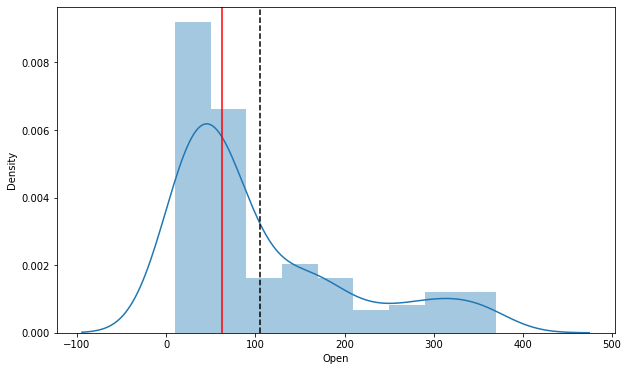

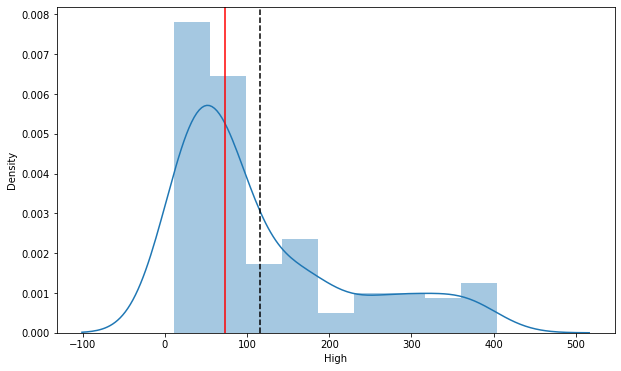

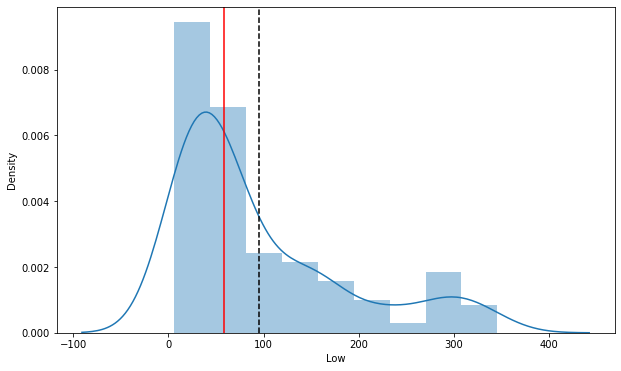

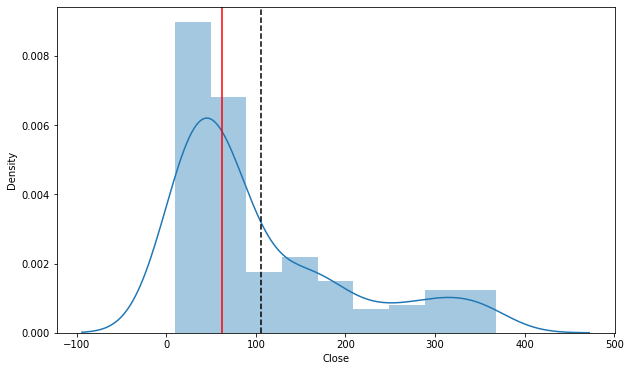

In [148]:
plt.rcParams['figure.figsize'] = (10,6)
for col in dataset.columns:
  sns.distplot(dataset[col])
  m=statistics.mean(dataset[col])
  med=statistics.median(dataset[col])
  plt.axvline(m,color='black',linestyle='--')
  plt.axvline(med,color='red',ls='solid')
  plt.show()

### Distribution Transformation

### Correlation Check

In [139]:
dataset.corr().T

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


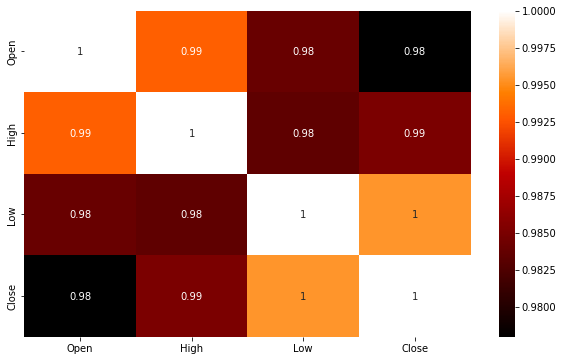

In [140]:
correlation=dataset.corr()
sns.heatmap(correlation,annot=True,cmap='gist_heat')
plt.show()

In [141]:
def calc_vif(dataset):
  Vif=pd.DataFrame()
  Vif['features']=dataset.columns
  Vif['vif value'] =[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return Vif 

In [142]:
calc_vif(dataset[dataset.columns[:-1]])

,features,vif value
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [143]:
dataset.corr().Close

Open     0.977971
High     0.985051
Low      0.995358
Close    1.000000
Name: Close, dtype: float64

### **Checking for Outliers**

<AxesSubplot:xlabel='Open', ylabel='Close'>

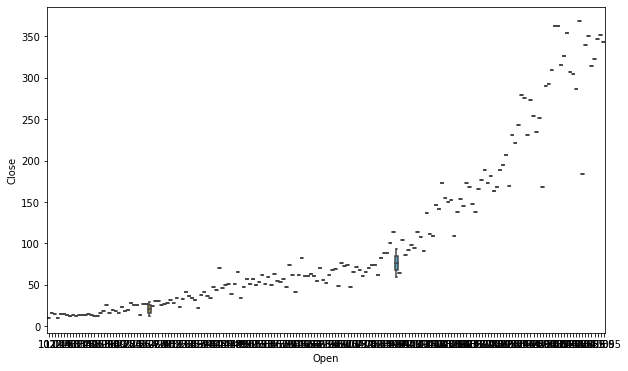

In [144]:
sns.boxplot(x='Open',y='Close',data=dataset)

### Misc

In [145]:
# for var in variables[:-1]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = dataset[var]
#     label = dataset['Close']
#     correlation = feature.corr(label)
#     plt.scatter(x=feature, y=label)
#     plt.xlabel(var)
#     plt.ylabel('Closing Price')
#     ax.set_title('Closing Price vs ' + var + '- correlation: ' + str(correlation))
#     z = np.polyfit(dataset[var], dataset['Close'], 1)
#     y_hat = np.poly1d(z)(dataset[var])

#     plt.plot(dataset[var], y_hat, "r--", lw=1)

# plt.show()